In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [2]:
# Assigning Data
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [4]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [5]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Data Cleaning and Preprocessing

In [7]:
# Check for missing values
print('Missing values in df:')
print(df.isnull().sum())

Missing values in df:
id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
# Convert month to a categorical type if not already
df['month'] = df['month'].astype('category')

In [9]:
# Convert other string-based columns which are categorical
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [10]:
# Display datatypes to verify
print('\nData types in df:')
print(df.dtypes)


Data types in df:
id              int64
age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y               int64
dtype: object


## Exploratory Data Analysis

In [11]:
# List numeric columns available in the data (excluding id to avoid bias)
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['id'], errors='ignore')
print('Numeric features:')
print(numeric_df.columns.tolist())

Numeric features:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


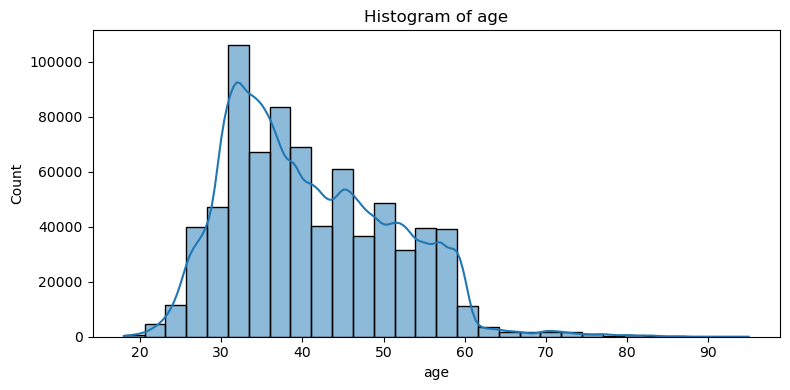

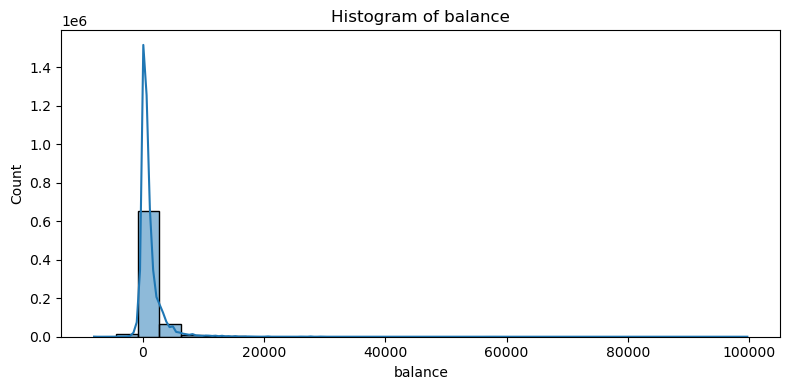

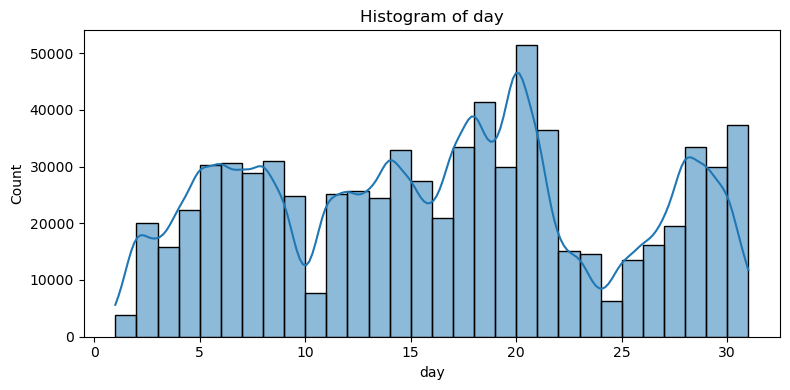

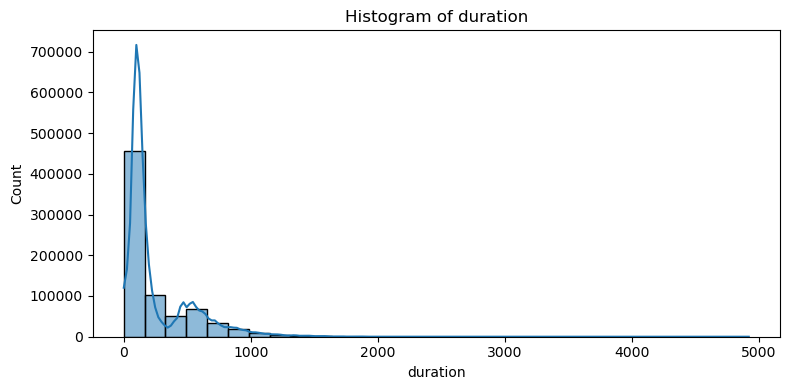

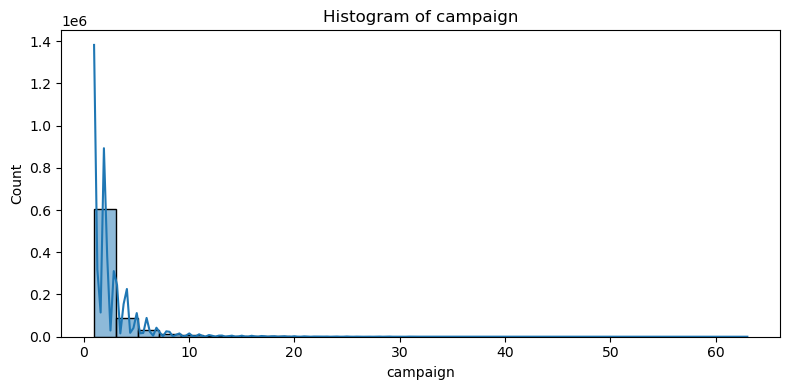

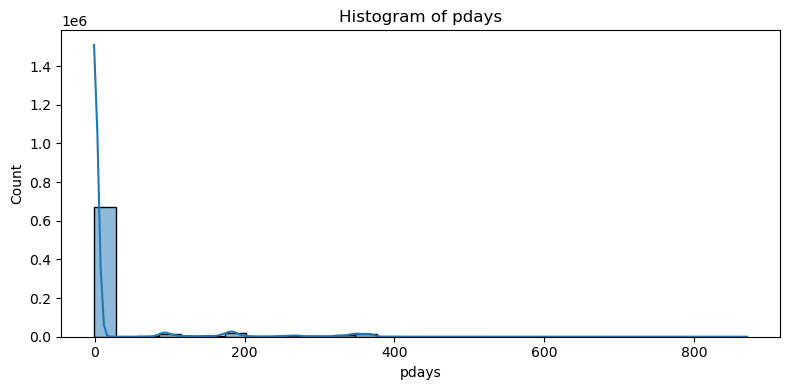

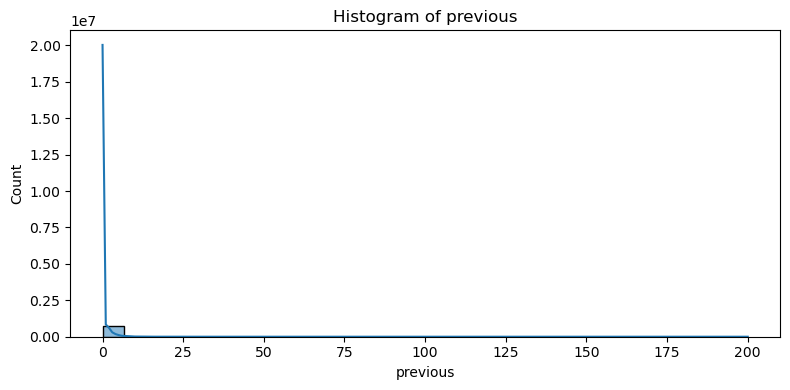

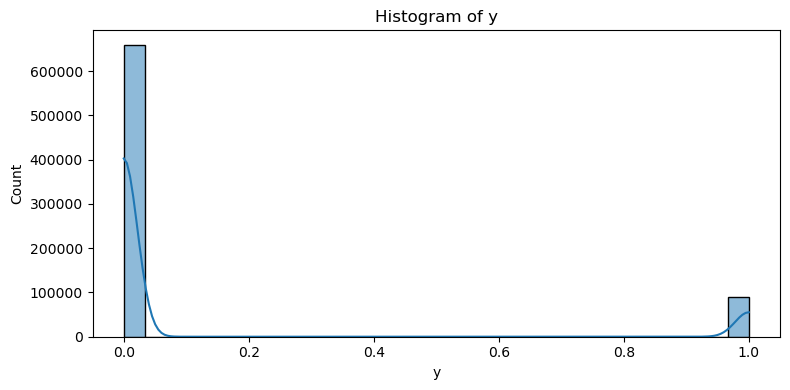

In [12]:
# Histogram for each numeric feature
numeric_features = numeric_df.columns.tolist()
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

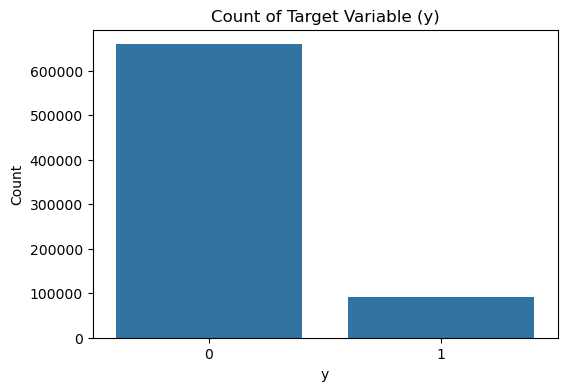

In [13]:
# Countplot for target variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y')
plt.title('Count of Target Variable (y)')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

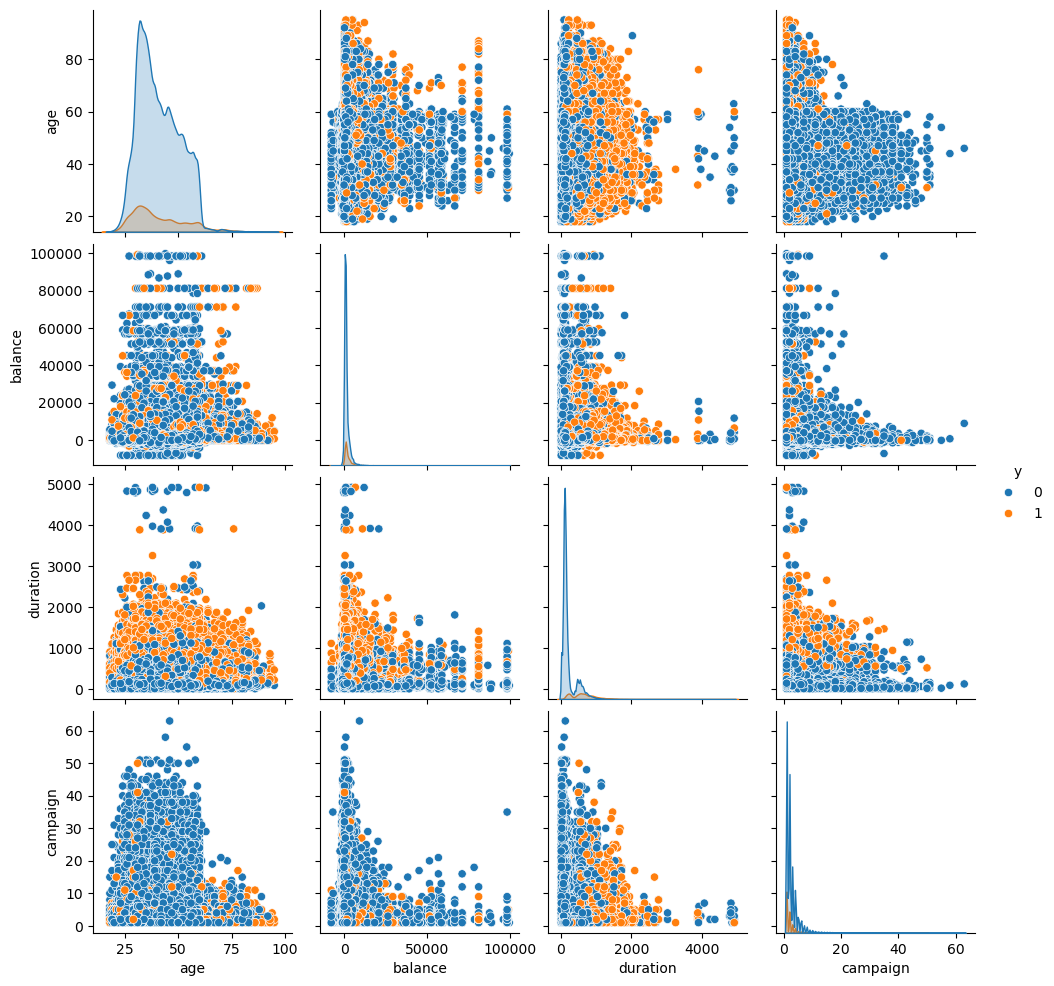

In [14]:
# Pair plot for a subset of features (to save time, we select a few numeric features)
sample_cols = ['age', 'balance', 'duration', 'campaign']
sns.pairplot(df[sample_cols + ['y']], hue='y')
plt.show()

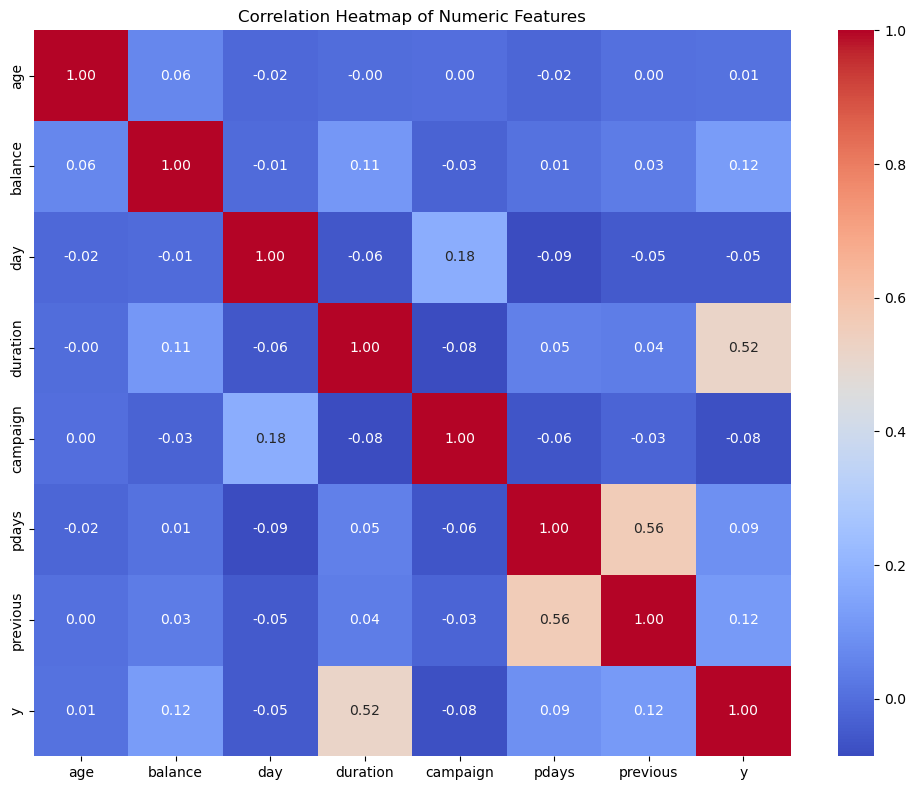

In [15]:
# If four or more numeric columns are available, plot a correlation heatmap
if len(numeric_features) >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

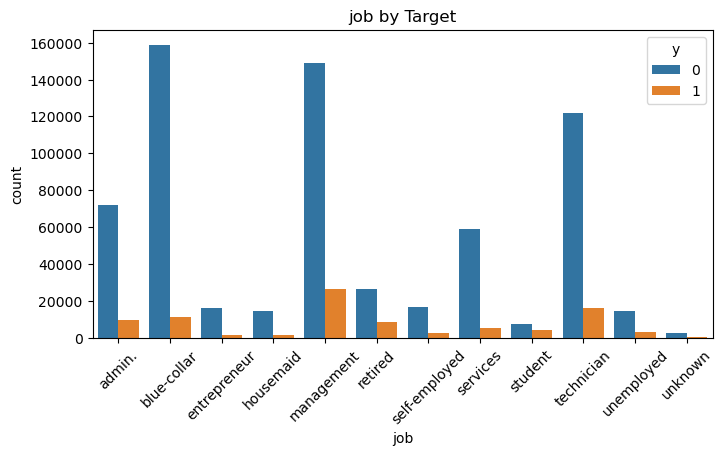

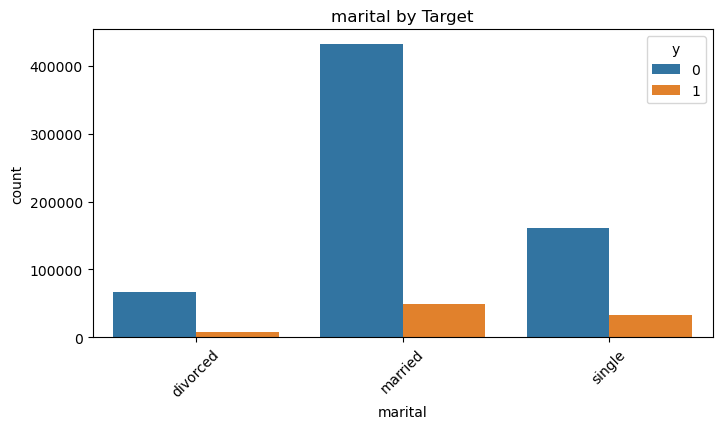

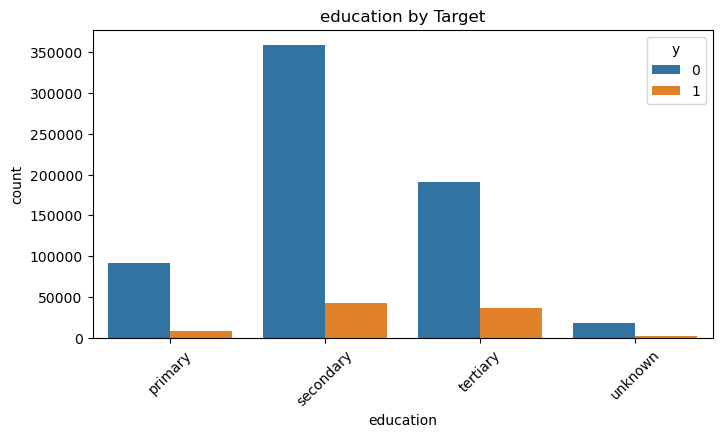

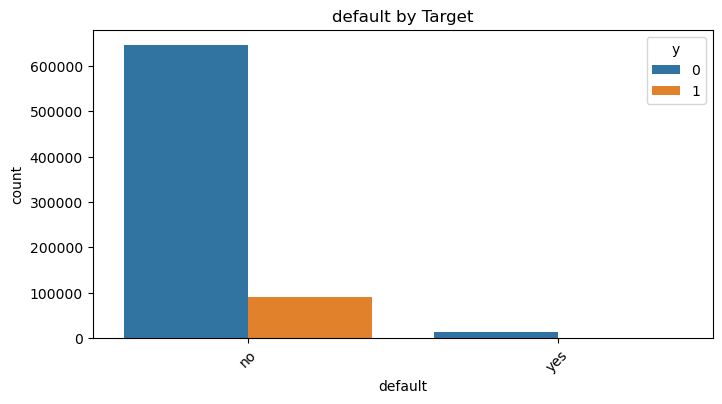

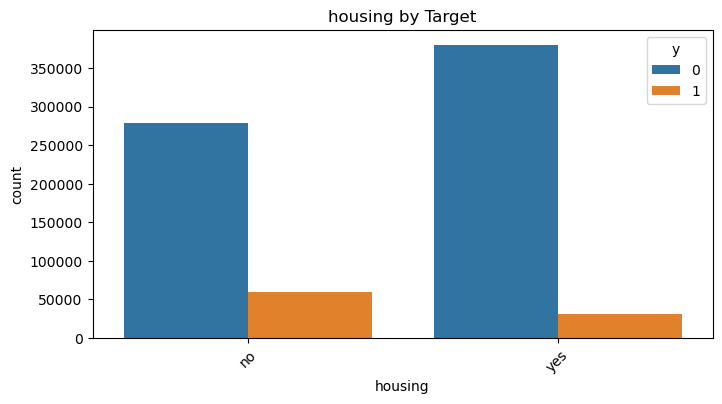

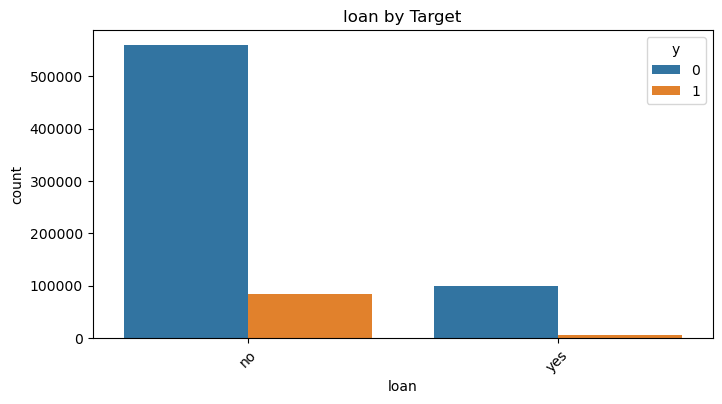

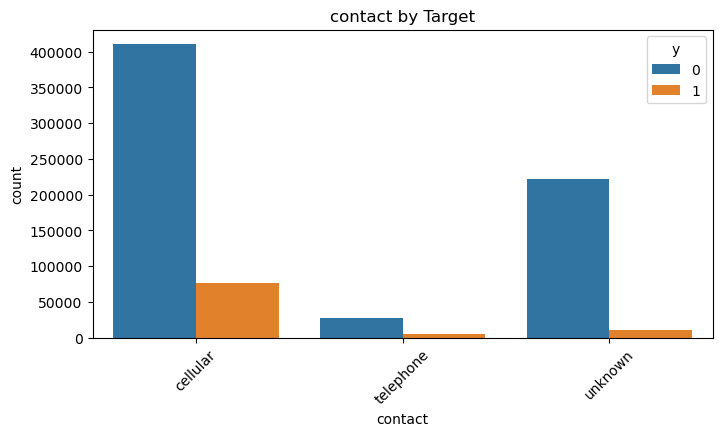

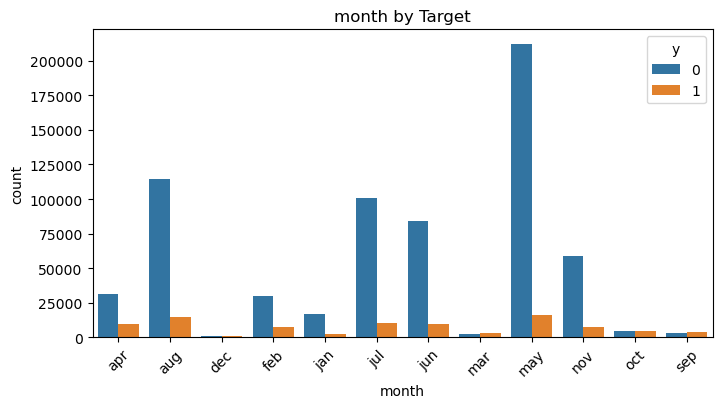

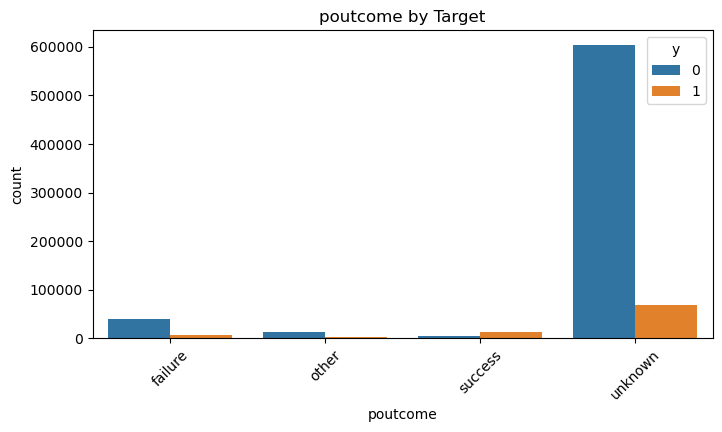

In [16]:
# Categorical Features Analysis
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue="y", data=df)
    plt.title(f"{col} by Target")
    plt.xticks(rotation=45)
    plt.show()


In [17]:
for col in cat_cols:
    print(f"\n{col} vs Target")
    print(pd.crosstab(df[col], df['y'], normalize='index'))


job vs Target
y                     0         1
job                              
admin.         0.883547  0.116453
blue-collar    0.932562  0.067438
entrepreneur   0.918614  0.081386
housemaid      0.915347  0.084653
management     0.849608  0.150392
retired        0.753759  0.246241
self-employed  0.870557  0.129443
services       0.917286  0.082714
student        0.659216  0.340784
technician     0.881679  0.118321
unemployed     0.820177  0.179823
unknown        0.879328  0.120672

marital vs Target
y                0         1
marital                     
divorced  0.888424  0.111576
married   0.898128  0.101872
single    0.829547  0.170453

education vs Target
y                 0         1
education                    
primary    0.916903  0.083097
secondary  0.894509  0.105491
tertiary   0.837351  0.162649
unknown    0.866613  0.133387

default vs Target
y               0         1
default                    
no       0.878053  0.121947
yes      0.953693  0.046307

housing vs T

Key Business Insights (Expected from EDA)

Imbalance: Only ~10–15% of clients subscribe → need resampling or class weights.

Duration: Longer calls strongly correlate with subscription.

Poutcome: Previous “success” leads to much higher probability of current success.

Education & Job: Higher education and white-collar jobs show higher subscription.

Contact Type & Month: Cellular and certain months (e.g., May, August) are more effective.

## Data Preprocessing & Feature Engineering

In [18]:
# Drop the 'duration' column to prevent data leakage
print(f"Original shape: {df.shape}")
df = df.drop('duration', axis=1)
print(f"Shape after dropping 'duration': {df.shape}")

In [19]:
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [20]:
# Define columns with potential outliers
outlier_cols = ['age', 'balance', 'campaign', 'pdays', 'previous']

for col in outlier_cols:
    # Calculate the 99th percentile
    percentile_99 = df[col].quantile(0.99)
    # Cap the values
    df[col] = np.where(df[col] > percentile_99, percentile_99, df[col])

# You can now re-run the boxplot code from EDA to see the effect
# sns.boxplot(y=df['balance'])
# plt.title('Balance after Capping Outliers')
# plt.show()

In [21]:
# Define the explicit order for education
education_order = ['unknown', 'primary', 'secondary', 'tertiary']

# Create an OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Apply the encoder
df['education_encoded'] = ordinal_encoder.fit_transform(df[['education']])

# We can do the same for months if we believe their order matters
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month_encoded'] = pd.Categorical(df['month'], categories=month_order, ordered=True).codes

# Now we can drop the original columns
df = df.drop(['education', 'month'], axis=1)

### Feature Engineering

In [22]:
# Select nominal columns to encode
nominal_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

print(f"\nShape before one-hot encoding: {df.shape}")
print(f"Shape after one-hot encoding: {df_encoded.shape}")

# Display the new columns
print("\nFirst 5 rows of the newly encoded dataframe:")
print(df_encoded.head())

# Our final dataframe for modeling
df_final = df_encoded.copy()

In [23]:
# Save the file
df.to_csv('Preprocessing.csv')

# ***************************************************************

C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_16416\1790314608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


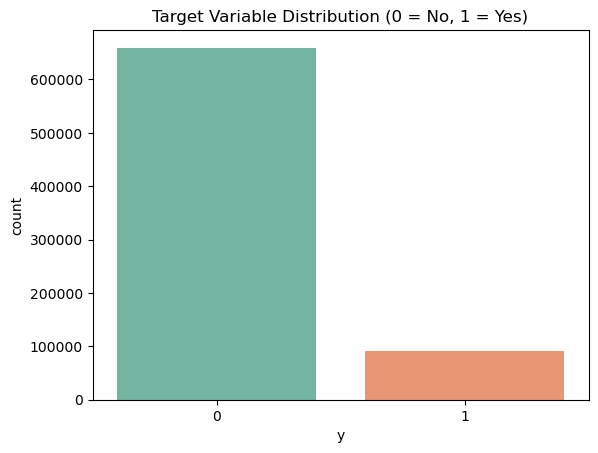

y
0    87.934933
1    12.065067
Name: proportion, dtype: float64


In [7]:
# Target distribution
sns.countplot(x='y', data=df, palette='Set2')
plt.title("Target Variable Distribution (0 = No, 1 = Yes)")
plt.show()

# Percentage
target_dist = df['y'].value_counts(normalize=True) * 100
print(target_dist)


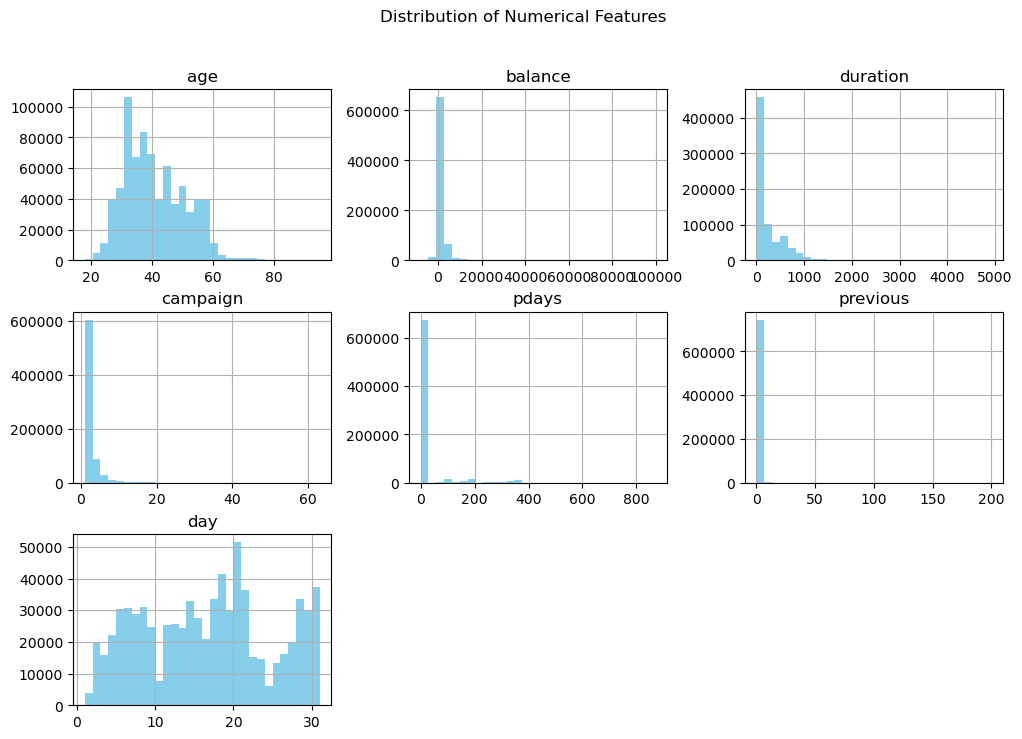

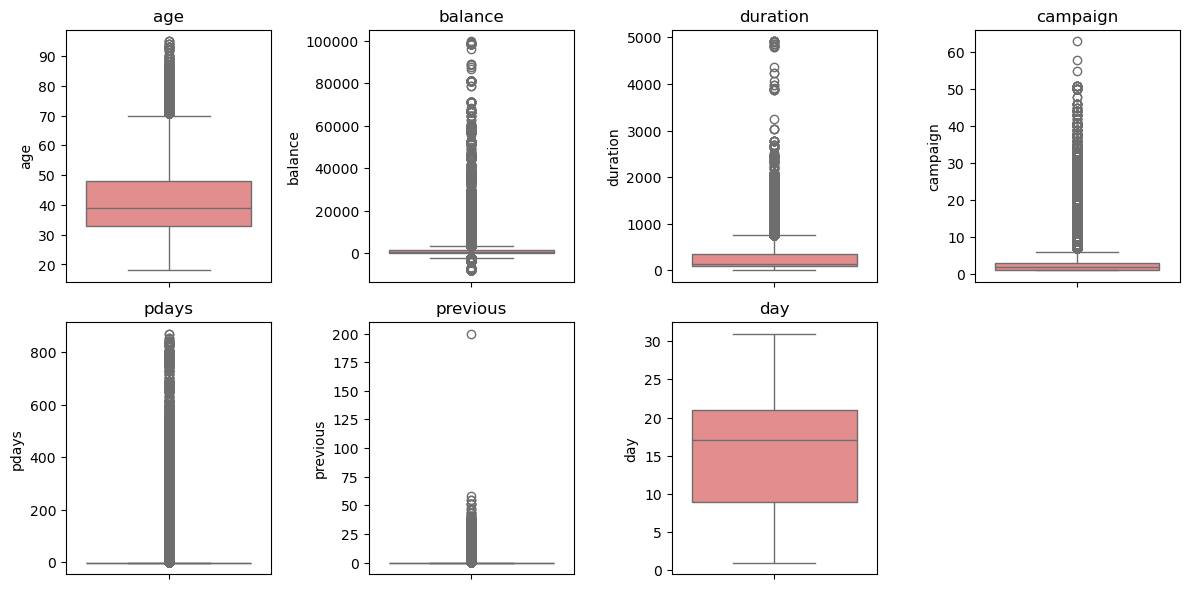

In [4]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']

# Histograms
df[num_cols].hist(figsize=(12,8), bins=30, color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Boxplots for outliers
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,4,i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(col)
plt.tight_layout()
plt.show()


C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_16416\1235897172.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set3")
C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_16416\1235897172.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set3")
C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_16416\1235897172.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_cou

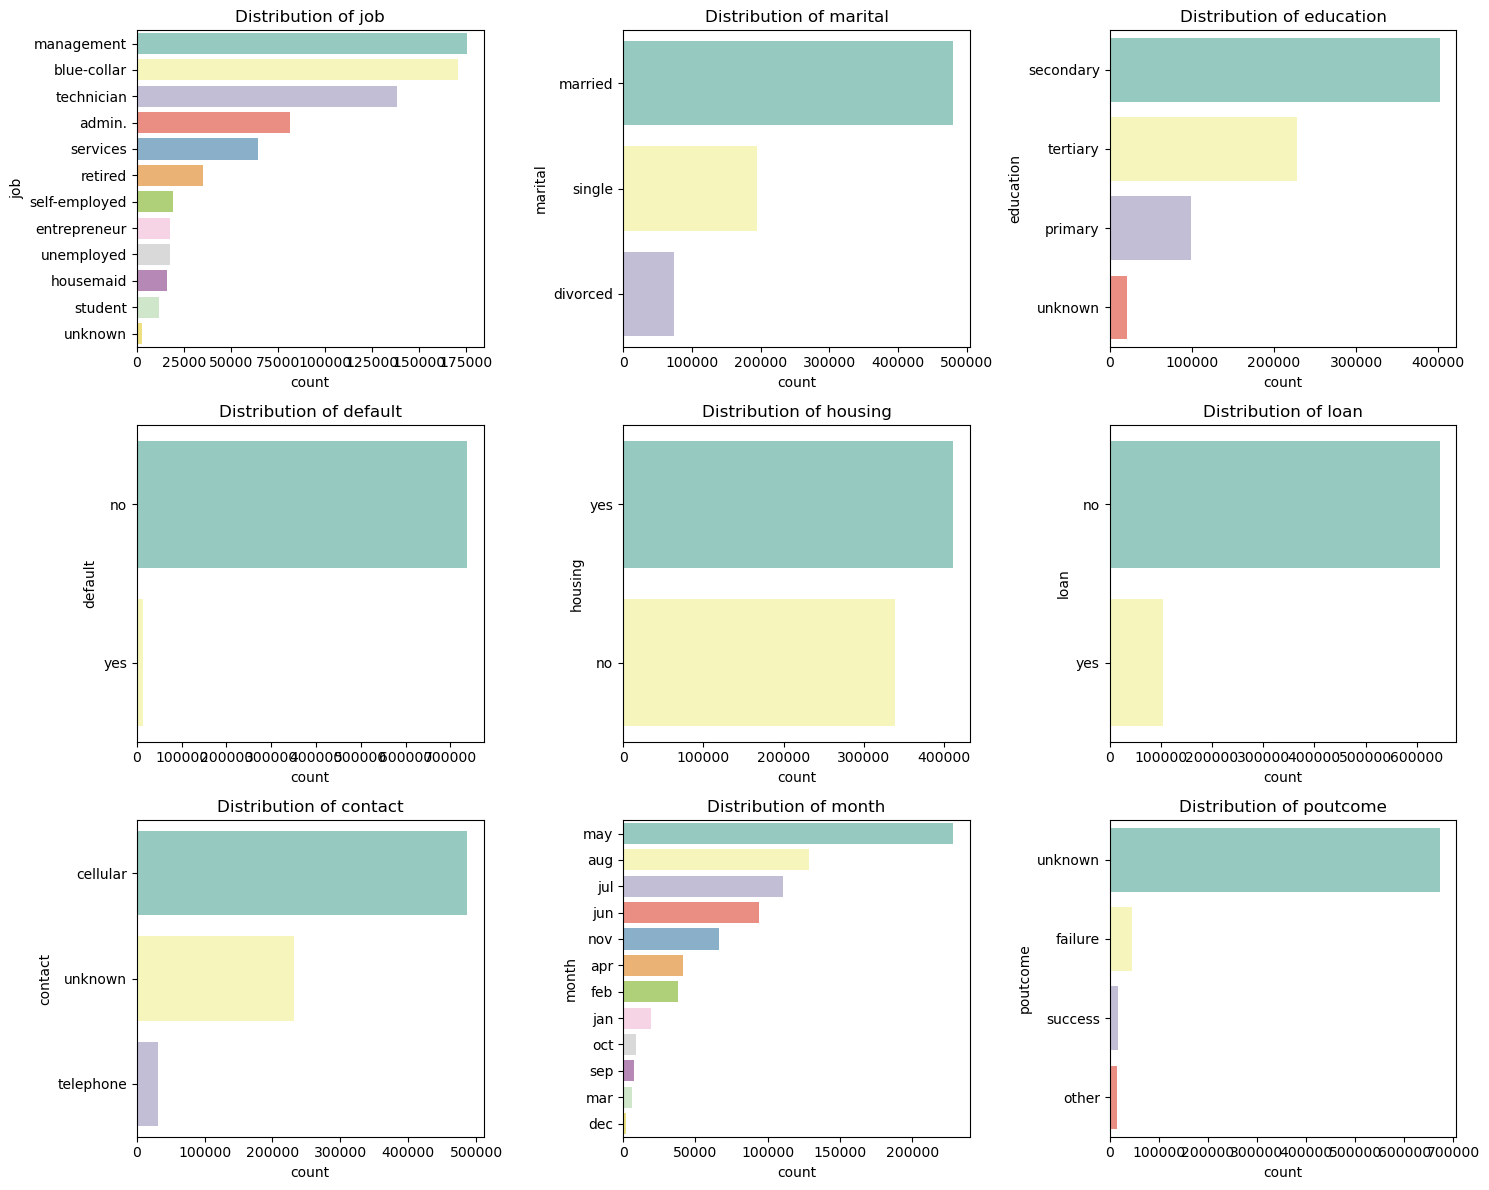

In [5]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
            'contact', 'month', 'poutcome']

# Count plots
plt.figure(figsize=(15,12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3,3,i)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set3")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


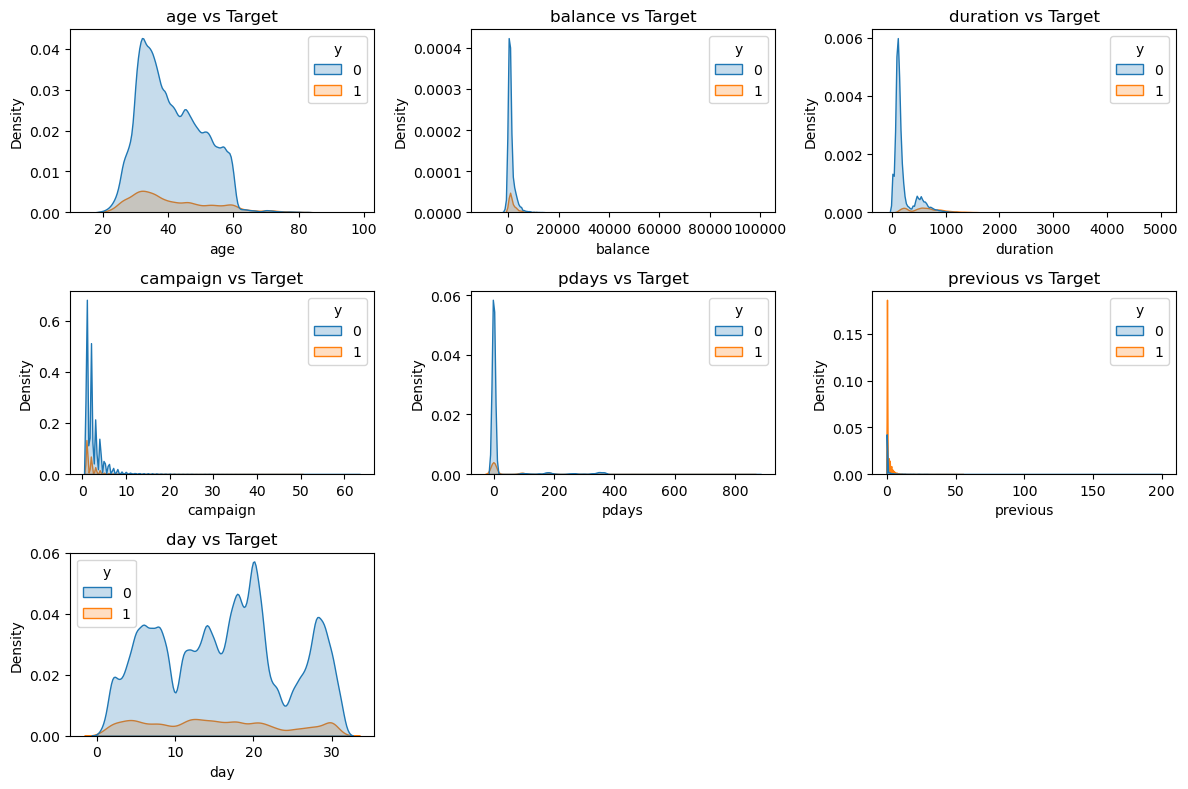

In [6]:
# 5. Target vs Features (Relationship Check)
# (a) Numerical vs Target
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.kdeplot(data=df, x=col, hue="y", fill=True)
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()

C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_16416\3704263177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='y', data=df, estimator=lambda x: sum(x)/len(x), errorbar=None, palette="Set2")
C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_16416\3704263177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='y', data=df, estimator=lambda x: sum(x)/len(x), errorbar=None, palette="Set2")
C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_16416\3704263177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c

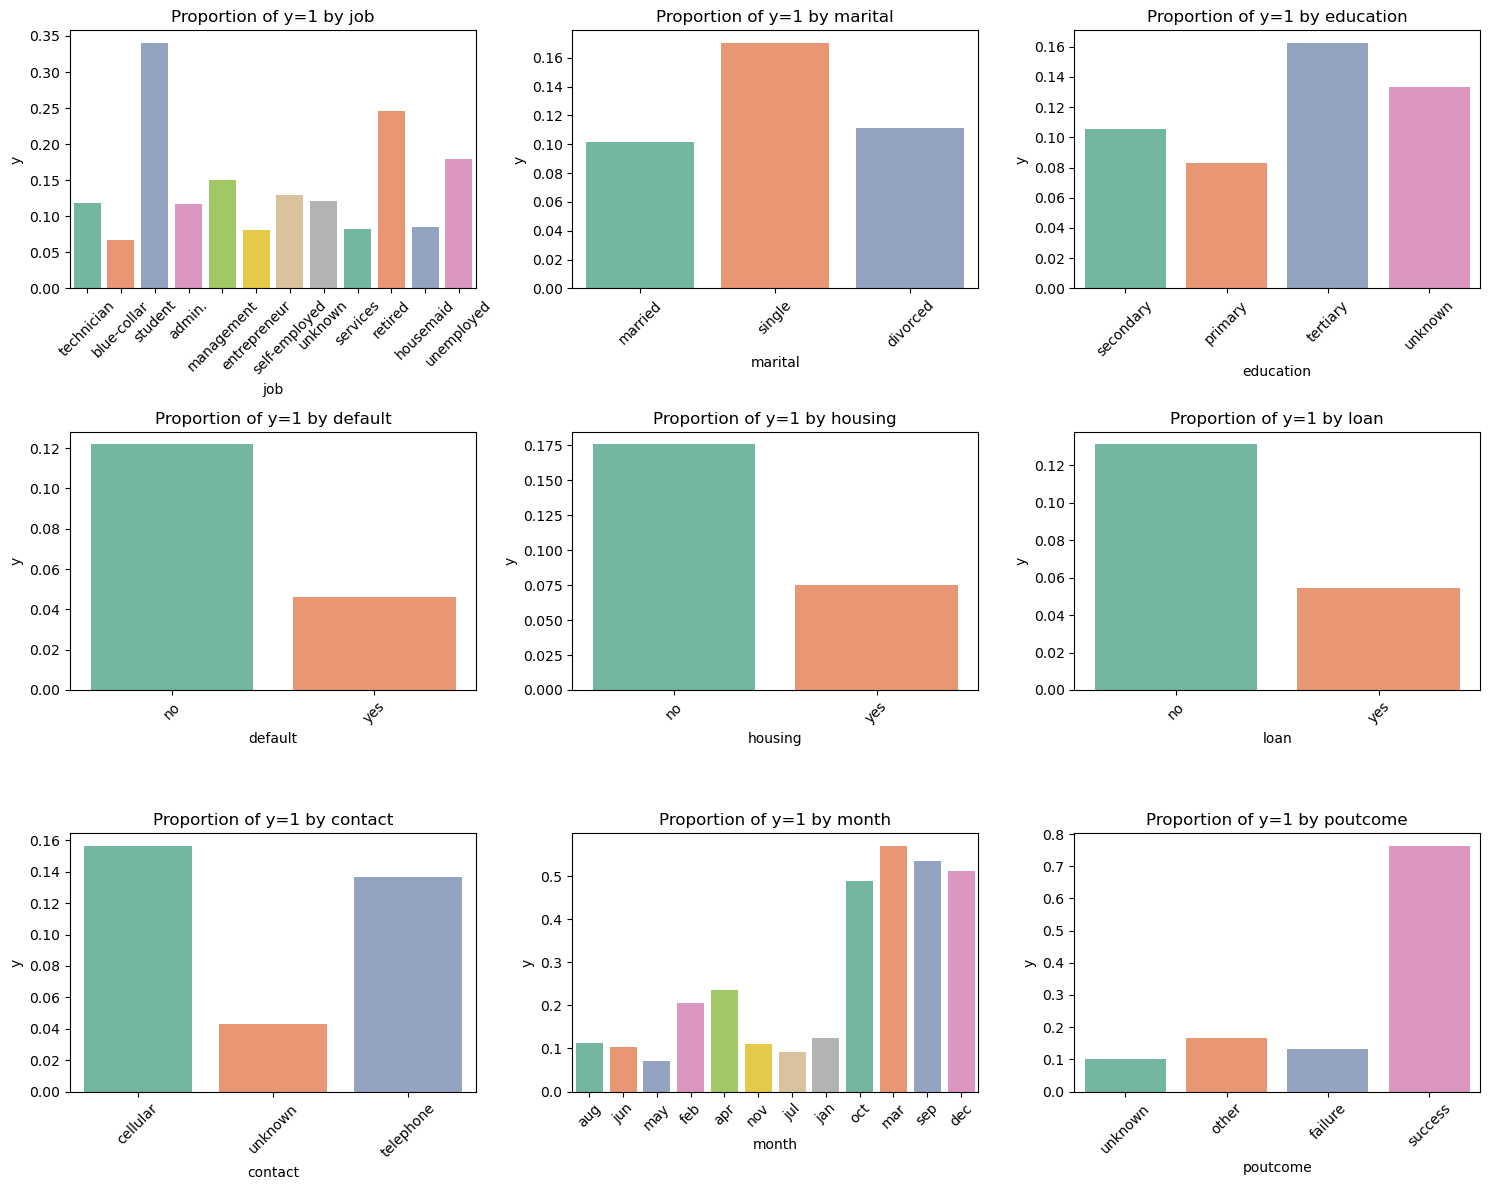

In [8]:
# (b) Categorical vs Target
plt.figure(figsize=(15,12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3,3,i)
    sns.barplot(x=col, y='y', data=df, estimator=lambda x: sum(x)/len(x), errorbar=None, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Proportion of y=1 by {col}")
plt.tight_layout()
plt.show()

In [9]:
import warnings
warnings.filterwarnings('ignore')

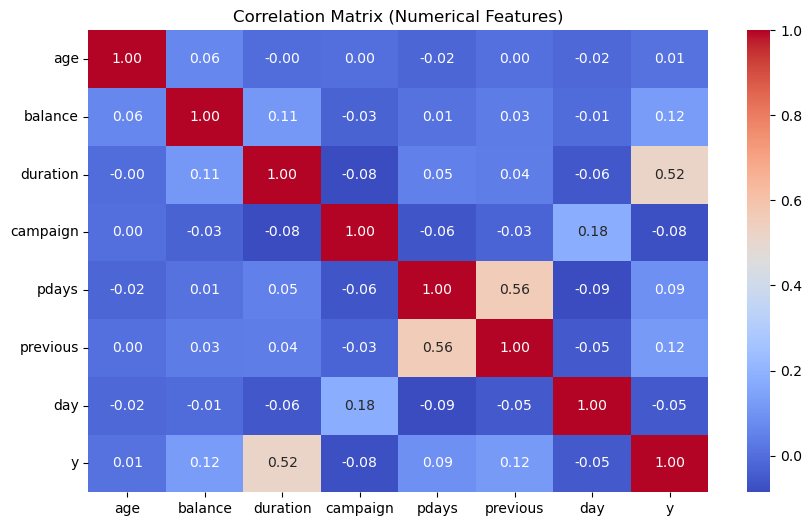

In [10]:
# 6. Correlation (Numerical Features Only)
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ['y']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()